In [420]:
import pandas as pd
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math
from mplsoccer import VerticalPitch

In [421]:
#load in csv straight from konklone download
df = pd.read_csv("D:\\Data Analysis TP\\Utd vs Roma.csv")

#filter for only actions by the team you want
OneTeam = df.loc[(df['teamId']==32)]

#Uncomment for only Second half positions
#OneTeam = OneTeam[OneTeam['period/displayName'] == 'SecondHalf']

#Make a new, single column for time and sort the events in chronological order
OneTeam["newsecond"] = 60*OneTeam["minute"]+OneTeam["second"]

OneTeam.sort_values(by=['newsecond'])

#identify the passer and then the recipient, who'll be the playerId of the next action
OneTeam['passer'] = OneTeam['playerId']

OneTeam['recipient'] = OneTeam['passer'].shift(-1)

#filter for only passes and then successful passes
Passes = OneTeam#.loc[(OneTeam['type/displayName']=="Pass")]

Completions = Passes.loc[(Passes['outcomeType/displayName']=="Successful")]

#find time of the team's first substitution and filter the df to only passes before that
Subs = OneTeam.loc[(OneTeam['type/displayName']=="SubstitutionOff")]
SubTimes = Subs["newsecond"]
SubOne = SubTimes.min()

#Find substituted players
subOn = OneTeam.loc[(OneTeam['type/displayName']=="SubstitutionOn")]

pas = pd.to_numeric(Completions['passer'],downcast='integer')
rec = pd.to_numeric(Completions['recipient'],downcast='integer')

Completions['passer'] = pas
Completions['recipient'] = rec

<ipython-input-421-2321ca475fc6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OneTeam["newsecond"] = 60*OneTeam["minute"]+OneTeam["second"]
<ipython-input-421-2321ca475fc6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OneTeam['passer'] = OneTeam['playerId']
<ipython-input-421-2321ca475fc6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [422]:
#Find number of subs made by team in the match
sublen = len(subOn['playerId'])

#Store player ID of every subbed on player
id = []
for i in range(len(subOn['playerId'])):
    id.append(subOn['playerId'].iloc[i])

In [423]:
#Dataframes for all players' actions

#Default: Before first sub
Sub0 = Completions.loc[Completions['newsecond'] < SubOne]

#After first sub
if len(id) == 0:
    print("no subs made")
elif len(id) == 1: 
    print("1 sub made")
    Sub1 = Completions[Completions['playerId'] == float(id[0])]
elif len(id) == 2:
    print("2 subs made")
    Sub1 = Completions[Completions['playerId'] == float(id[0])]
    Sub2 = Completions[Completions['playerId'] == float(id[1])]
elif len(id) == 3:
    print("3 subs made")
    Sub1 = Completions[Completions['playerId'] == float(id[0])]
    Sub2 = Completions[Completions['playerId'] == float(id[1])]
    Sub3 = Completions[Completions['playerId'] == float(id[2])]
elif len(id) == 4:
    print("4 subs made")
    Sub1 = Completions[Completions['playerId'] == float(id[0])]
    Sub2 = Completions[Completions['playerId'] == float(id[1])]
    Sub3 = Completions[Completions['playerId'] == float(id[2])]
    Sub4 = Completions[Completions['playerId'] == float(id[3])]
else:
    print("5 subs made")
    Sub1 = Completions[Completions['playerId'] == float(id[0])]
    Sub2 = Completions[Completions['playerId'] == float(id[1])]
    Sub3 = Completions[Completions['playerId'] == float(id[2])]
    Sub4 = Completions[Completions['playerId'] == float(id[3])]
    Sub5 = Completions[Completions['playerId'] == float(id[4])]

3 subs made


In [424]:
#Find Average Locations till 1st sub
average_locs_and_count = Sub0.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
average_locs_and_count.columns = ['x', 'y', 'count']

#Find Average Locations after 1st sub
if len(id) == 0:
    print("no subs made")
elif len(id) == 1: 
    average_locs_and_count1 = Sub1.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count1.columns = ['x', 'y', 'count']
elif len(id) == 2:
    average_locs_and_count1 = Sub1.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count1.columns = ['x', 'y', 'count']
    average_locs_and_count2 = Sub2.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count2.columns = ['x', 'y', 'count']
elif len(id) == 3:
    average_locs_and_count1 = Sub1.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count1.columns = ['x', 'y', 'count']
    average_locs_and_count2 = Sub2.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count2.columns = ['x', 'y', 'count']
    average_locs_and_count3 = Sub3.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count3.columns = ['x', 'y', 'count']
elif len(id) == 4:
    average_locs_and_count1 = Sub1.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count1.columns = ['x', 'y', 'count']
    average_locs_and_count2 = Sub2.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count2.columns = ['x', 'y', 'count']
    average_locs_and_count3 = Sub3.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count3.columns = ['x', 'y', 'count']
    average_locs_and_count4 = Sub4.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count4.columns = ['x', 'y', 'count']
else:
    average_locs_and_count1 = Sub1.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count1.columns = ['x', 'y', 'count']
    average_locs_and_count2 = Sub2.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count2.columns = ['x', 'y', 'count']
    average_locs_and_count3 = Sub3.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count3.columns = ['x', 'y', 'count']
    average_locs_and_count4 = Sub4.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count4.columns = ['x', 'y', 'count']
    average_locs_and_count5 = Sub5.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count5.columns = ['x', 'y', 'count']

In [425]:
#find number of passes along each 'path' of passer to recipient
passes_between = Sub0.groupby(['passer', 'recipient']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

passes_between = passes_between.merge(average_locs_and_count, left_on='passer', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='recipient', right_index=True,
                                      suffixes=['', '_end'])

In [426]:
size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)


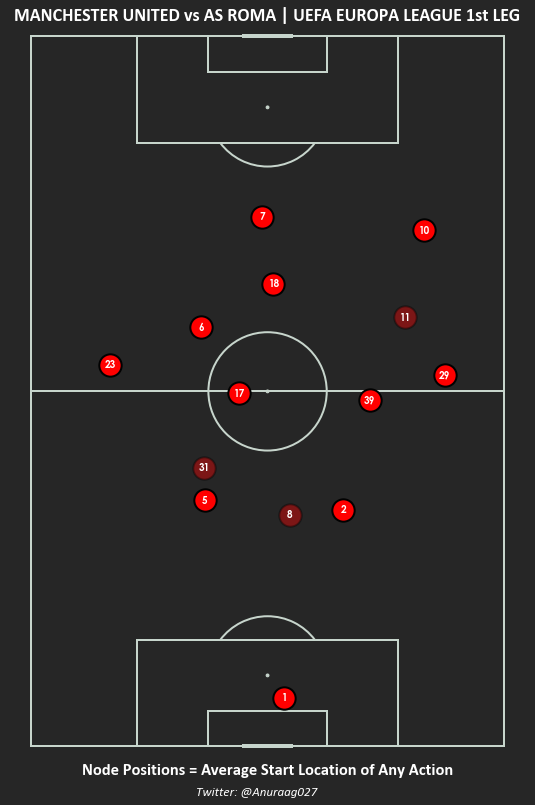

In [433]:
#set minimum threshold for pass arrows to be plotted. So this will only plot combos which occured at least 5 times.
passes_between = passes_between.loc[(passes_between['pass_count']>5)]


#Make arrows less transparent if they have a higher count, totally optional of course
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - min_transparency)) + min_transparency
color[:, 3] = c_transparency

#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#262626', line_color='#c7d5cc',
              constrained_layout=False, tight_layout=False)
fig, ax = pitch.draw(figsize=(20, 11))

########################### PLOT ARROWS PART WAS HERE, PASTED AT BOTTOM ###########################

#Color for nodes
node_color = 'red'

#Starting 11 nodes
pass_nodes = pitch.scatter(1.2*average_locs_and_count.x, 80-0.8*average_locs_and_count.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)

#Plot nodes for subs
if len(id) == 0:
    print("no subs made")
elif len(id) == 1: 
    pass_nodes = pitch.scatter(1.2*average_locs_and_count1.x, 80-0.8*average_locs_and_count1.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.5, ax=ax, zorder=2)
elif len(id) == 2:
    pass_nodes = pitch.scatter(1.2*average_locs_and_count1.x, 80-0.8*average_locs_and_count1.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count2.x, 80-0.8*average_locs_and_count2.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
elif len(id) == 3:
    pass_nodes = pitch.scatter(1.2*average_locs_and_count1.x, 80-0.8*average_locs_and_count1.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count2.x, 80-0.8*average_locs_and_count2.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count3.x, 80-0.8*average_locs_and_count3.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    
elif len(id) == 4:
    pass_nodes = pitch.scatter(1.2*average_locs_and_count1.x, 80-0.8*average_locs_and_count1.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count2.x, 80-0.8*average_locs_and_count2.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count3.x, 80-0.8*average_locs_and_count3.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count4.x, 80-0.8*average_locs_and_count4.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)

else:
    pass_nodes = pitch.scatter(1.2*average_locs_and_count1.x, 80-0.8*average_locs_and_count1.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count2.x, 80-0.8*average_locs_and_count2.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count3.x, 80-0.8*average_locs_and_count3.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count4.x, 80-0.8*average_locs_and_count4.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)
    pass_nodes = pitch.scatter(1.2*average_locs_and_count5.x, 80-0.8*average_locs_and_count5.y, s=500,
                           color=node_color, edgecolors="#010101", linewidth=2, alpha=0.4, ax=ax, zorder=2)


#Andale Mono
#anootation/key at bottom
pitch.annotate("Node Positions = Average Start Location of Any Action", (-4, 40), color='w',
               fontsize=16.5, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Calibri")


#Uncomment these next two lines to get each node labeled with the player id.
#Add jersey number against playerID for the team you are plotting, all in int type

#dictionary for player id vs jersey number
team = {114397:17,"125793":"Alex Telles",97752:6,"275035":"Donny van de Beek",123761:18,38128:31,79554:1,25363:8,100008:2,24328:7,"8195":"Lee Grant",99487:5,"299271":"Axel Tuanzebe",300299:10,118244:23,"304008":"Dean Henderson",331924:29,367782:11,"384143":"Brandon Williams",336915:39,"302313":"Daniel James","243814":"Eric Bailly","386634":"Amad"}

for index, row in average_locs_and_count.iterrows():
    for key,value in team.items():
        if key == index:
            pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)

if len(id) == 0:
    print("no subs made")
elif len(id) == 1: 
    for index, row in average_locs_and_count1.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
elif len(id) == 2:
    for index, row in average_locs_and_count1.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count2.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)

elif len(id) == 3:
    for index, row in average_locs_and_count1.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count2.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count3.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    
elif len(id) == 4:
    for index, row in average_locs_and_count1.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count2.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count3.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count4.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)

else:
    for index, row in average_locs_and_count1.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count2.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count3.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count4.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)
    for index, row in average_locs_and_count5.iterrows():
        for key,value in team.items():
            if key == index:
                pitch.annotate(value, xy=(1.2*row.x, 80-0.8*row.y), c='white', va='center', ha='center', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)            
        
#Set the background color
fig.patch.set_facecolor('#262626')

#annotatios
ax.set_title("MANCHESTER UNITED vs AS ROMA | UEFA EUROPA LEAGUE 1st LEG", fontsize=18, color="w", fontfamily="Calibri", fontweight='bold', pad=-8)
fig.text(.45,-.01,f'Twitter: @Anuraag027',fontstyle='italic',fontsize=13,fontfamily='Calibri',color='w')

#plt.savefig('D:\\Data Analysis TP\\Utd vs Roma avg pos.png',dpi=600,bbox_inches = 'tight',facecolor="#262626")

In [428]:
#plot arrows
# def pass_line_template(ax, x, y, end_x, end_y, line_color):
#     ax.annotate('', xy=(80-.8*end_y, 1.2*end_x), xytext=(80-.8*y, 1.2*x), zorder=1,
#     arrowprops=dict(arrowstyle='-|>', linewidth=4, color='#c7d5cc', alpha=.85))
    
# def pass_line_template_shrink(ax, x, y, end_x, end_y, line_color, dist_delta=1.2):
#     dist = math.hypot(end_x - x, end_y - y)
#     angle = math.atan2(end_y-y, end_x-x)
#     upd_x = x + (dist - dist_delta) * math.cos(angle)
#     upd_y = y + (dist - dist_delta) * math.sin(angle)
#     pass_line_template(ax, x, y, upd_x, upd_y, line_color=line_color)
    
    
# for index, row in passes_between.iterrows():
#     pass_line_template_shrink(ax,row['x'],row['y'],row['x_end'],row['y_end'],'white')
    
# pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
#                          1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
#                          headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

# size=1000
# radius = math.sqrt(size)/2.
# arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
#                                     posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
#                                     arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

# ax.add_patch(arrow)

In [429]:
d={"114397":"Fred","125793":"Alex Telles","97752":"Paul Pogba","275035":"Donny van de Beek","123761":"Bruno Fernandes","38128":"Nemanja Matic","79554":"David de Gea","25363":"Juan Mata","100008":"Victor Lindelöf","24328":"Edinson Cavani","8195":"Lee Grant","99487":"Harry Maguire","299271":"Axel Tuanzebe","300299":"Marcus Rashford","118244":"Luke Shaw","304008":"Dean Henderson","331924":"Aaron Wan-Bissaka","367782":"Mason Greenwood","384143":"Brandon Williams","336915":"Scott McTominay","302313":"Daniel James","243814":"Eric Bailly","386634":"Amad"}